# Building final dataframes and EDA

In [220]:
# import modules
import re
import pandas as pd
import numpy as np
from nltk.collocations import *
from nltk import FreqDist, word_tokenize, regexp_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## Read in dataframes

In [114]:

# these are the NYT best seller list
nyt_2016_df = pd.read_csv('csv_files/nyt_2016_df.csv')
nyt_2017_df = pd.read_csv('csv_files/nyt_2017_df.csv')
nyt_2018_df = pd.read_csv('csv_files/nyt_2018_df')

# these are all of our books
gr_2016_df = pd.read_csv('csv_files/goodreads_2016_df.csv')
gr_2017_df = pd.read_csv('csv_files/goodreads_2017_df.csv')
gr_2018_df = pd.read_csv('csv_files/goodreads_2018_df.csv')

## Merge thte NYT Bestseller dataframes

In [115]:
nyt_2018_df.shape

(100, 10)

In [116]:
nyt_2016_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016


In [117]:
nyt_2017_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,David Grann,"In the 1920s, the richest people per capita in...",ebook,Nonfiction,April,359,Doubleday,4.11,Killers of the Flower Moon: The Osage Murders ...,2017.0
1,George Saunders,"In his long-awaited first novel, American mast...",Hardcover,Fiction,February,343,Random House,3.79,Lincoln in the Bardo,2017.0
2,Min Jin Lee,<i>Pachinko</i>,Hardcover,Historical,February,489,Grand Central Publishing,4.26,Pachinko,2017.0
3,Mohsin Hamid,In a country teetering on the brink of civil w...,Hardcover,Fiction,March,231,Riverhead (first publ...,3.81,Exit West,2017.0
4,Ali Smith,Autumn. Season of mists and mellow fruitfulnes...,Hardcover,Fiction,February,263,Pantheon Books (first...,3.72,Autumn,2016.0


In [118]:
nyt_2018_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Michael Ondaatje,In a narrative as mysterious as memory itself ...,Paperback,Historical,June,304,Jonathan Cape (first ...,3.73,Warlight,2018.0
1,Tayari Jones,Newlyweds Celestial and Roy are the embodiment...,Hardcover,Fiction,February,308,Algonquin Books (firs...,4.01,An American Marriage,2018.0
2,Tommy Orange,"Fierce, angry, funny, heartbreaking—Tommy Oran...",Hardcover,Fiction,June,294,Knopf,4.07,There There,2018.0
3,Lisa Halliday,A singularly inventive and unforgettable debut...,Hardcover,Fiction,February,277,Simon & Schuster,3.60,Asymmetry,2018.0
4,Richard Powers,An Air Force loadmaster in the Vietnam War is ...,Hardcover,Fiction,April,502,W. W. Norton & Company,4.25,The Overstory,2018.0


In [119]:
# put it together
nyt_df = pd.concat([nyt_2016_df, nyt_2017_df, nyt_2018_df])

In [120]:
nyt_df.shape

(300, 10)

In [121]:
nyt_df 

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0


In [122]:
#df[df.duplicated(['ID'], keep=False)]

# this is to test
title_df = nyt_df[nyt_df.duplicated(['title'], keep=False)]

In [123]:
nyt_df

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0


In [124]:
title_df.shape

(22, 10)

In [125]:
nyt_df = nyt_df.drop_duplicates(subset='title')#, keep="last")

In [126]:
nyt_df.shape[0]

289

### Merge best seller dataframe with all books dataframe

In [127]:
nyt_df.head()

,author,description,format,genre,month,pages,publisher,rating,title,year
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0


In [128]:
# add column for Bestseller
nyt_df.shape


(289, 10)

In [129]:
# add in target feature
nyt_df['best_seller'] = 1

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
nyt_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Yaa Gyasi,A novel of breathtaking sweep and emotional po...,Hardcover,Historical,June,320,Alfred A. Knopf,4.42,Homegoing,2016.0,1
1,Colson Whitehead,Cora is a slave on a cotton plantation in Geor...,Hardcover,Historical,August,306,Doubleday Books,4.03,The Underground Railroad,2016.0,1
2,Paul Kalanithi,"For readers of Atul Gawande, Andrew Solomon, a...",Kindle Edition,Nonfiction,January,208,Random House (first p...,4.34,When Breath Becomes Air,2016.0,1
3,Matthew Desmond,<b><i>New York Times </i>Bestseller<br/><br/>F...,Hardcover,Nonfiction,March,418,Crown,4.49,Evicted: Poverty and Profit in the American City,2016.0,1
4,Ian McGuire,LONGLISTED FOR THE MAN BOOKER PRIZE 2016,Hardcover,Historical,March,272,Henry Holt and Co. (f...,4.00,The North Water,2016.0,1
5,Han Kang,"Before the nightmare, Yeong-hye and her husban...",Hardcover,Fiction,February,188,Hogarth Press (first ...,3.58,The Vegetarian,2007.0,1
6,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0,1
7,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,1
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,1
9,Zadie Smith,Two brown girls dream of being dancers--but on...,Hardcover,Fiction,November,453,Hamish Hamilton,3.57,Swing Time,2016.0,1


In [131]:
# this is making the dataframe with all the books

choiceawards_df = pd.concat([gr_2016_df, gr_2017_df, gr_2018_df])

In [132]:
choiceawards_df.shape

(1220, 10)

In [133]:
doubled_books_df = choiceawards_df[choiceawards_df.duplicated(['title'], keep=False)]

In [134]:
doubled_books_df.shape


(96, 10)

In [135]:
choiceawards_df = choiceawards_df.drop_duplicates(subset='title')#, keep="last")

In [136]:
choiceawards_df.shape

(1171, 10)

In [137]:
# set best seller feature to false
choiceawards_df['best_seller'] = 0

In [138]:
choiceawards_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0


In [139]:
all_books = pd.concat([choiceawards_df, nyt_df])
all_books.shape
# all_books nyt best sellers and all the books from good reads so there are duplicates

(1460, 11)

In [140]:
all_books

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House (first p...,3.51,My Name Is Lucy Barton,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0


## fix for publishers with messy names

In [152]:
# some publishers have extra info after their names 
all_books.loc[:,['publisher']]

,publisher
0,Flatiron Books
1,Thomas Dunne Books
2,Random House
3,Ecco
4,Ballantine Books
5,Random House
6,Harper
7,Simon Schuster
8,Random House
9,Riverhead Books


In [144]:
publishers = all_books['publisher']
len(publishers)


1460

In [146]:
clean_publishers = []
for i in publishers:
    clean_publishers.append(i.split('   ')[0])

In [148]:
len(clean_publishers)

1460

In [149]:
type(clean_publishers)

list

In [150]:
all_books['publisher'] = clean_publishers

In [155]:
len(all_books['publisher'].unique())

398

## more_than_one_df checks to see where the duplicate books are

In [156]:
more_than_one_df = all_books[all_books.duplicated(['title'], keep=False)]

In [157]:
more_than_one_df.shape

(174, 11)

In [158]:
more_than_one_df

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
6,Ann Patchett,<strong>#1 <em>New York Times </em>Bestseller<...,Hardcover,Fiction,September,336,Harper,3.81,Commonwealth,2016.0,0
8,Elizabeth Strout,The profound mother-daughter bond is explored ...,Hardcover,Fiction,January,193,Random House,3.51,My Name Is Lucy Barton,2016.0,0
10,Jacqueline Woodson,Running into a long-ago friend sets memories f...,Hardcover,Fiction,August,177,Amistad,3.86,Another Brooklyn,2016.0,0
11,Jonathan Safran Foer,<b>A monumental new novel from the bestselling...,Hardcover,Fiction,September,592,"Farrar, Straus and Giroux",3.64,Here I Am,2016.0,0
12,Richard Russo,"Richard Russo, at the very top of his game, no...",Hardcover,Fiction,May,477,Knopf,4.08,Everybody's Fool,2016.0,0
13,Nathan Hill,A hilarious and deeply touching debut novel ab...,Hardcover,Fiction,August,640,Knopf,4.09,The Nix,2016.0,0
15,Karan Mahajan,FINALIST FOR THE NATIONAL BOOK AWARD 2016,Hardcover,Fiction,March,288,Viking,3.57,The Association of Small Bombs,2016.0,0
16,Ian McEwan,<b>Nutshell is a classic story of murder and d...,Hardcover,Fiction,September,208,Nan A. Talese,3.69,Nutshell,2016.0,0
20,Stephen King,The spectacular finale to the New York Times b...,Hardcover,Horror,June,432,Scribner,4.09,End of Watch,2016.0,0
25,Noah Hawley,"On a foggy summer night, eleven people—ten pri...",Hardcover,Fiction,May,391,Grand Central Publishing,3.74,Before the Fall,2016.0,0


In [159]:
more_than_one_df[more_than_one_df['title'].str.contains("Small Fry")==True]

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
194,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,0
96,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,1


In [ ]:
# There are 

In [160]:
all_books = all_books.drop_duplicates(subset='title', keep='last')

In [161]:
# this is to cheack that the Small Fry that was not on the bestseller list was dropped
all_books[all_books['title'].str.contains("Small Fry")==True]

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
96,Lisa Brennan-Jobs,Born on a farm and named in a field by her par...,Hardcover,Nonfiction,September,383,Grove Press,3.94,Small Fry,2018.0,1


In [162]:
check_double = all_books[all_books.duplicated(['title'], keep=False)]

In [163]:
check_double.shape

(0, 11)

In [164]:
# all_books as the nyt best sellers and non best seller labeled with 1 and 0



In [165]:
all_books.shape

(1373, 11)

In [229]:
all_books.head(15)

,author,description,format,genre,month,pages,publisher,rating,title,year,best_seller
0,Liane Moriarty,Six responsible adults. Three cute kids. One s...,Hardcover,Fiction,July,415,Flatiron Books,3.56,Truly Madly Guilty,2016.0,0
1,Bryn Greenwood,"As the daughter of a meth dealer, Wavy knows n...",Hardcover,Fiction,August,346,Thomas Dunne Books,4.07,All the Ugly and Wonderful Things,2016.0,0
2,Emma Cline,"Northern California, during the violent end of...",Hardcover,Fiction,June,355,Random House,3.47,The Girls,2016.0,0
3,Cynthia D'Aprix Sweeney,"<i>A warm, funny and acutely perceptive debut ...",Hardcover,Fiction,March,368,Ecco,3.42,The Nest,2016.0,0
4,Jodi Picoult,Ruth Jefferson is a labor and delivery nurse a...,Hardcover,Fiction,October,480,Ballantine Books,4.35,Small Great Things,2016.0,0
5,Curtis Sittenfeld,This version of the Bennet family and Mr. Darc...,Hardcover,Fiction,April,492,Random House,3.61,Eligible,2016.0,0
7,Steven Rowley,Combining the emotional depth of,Hardcover,Fiction,June,307,Simon Schuster,3.72,Lily and the Octopus,2016.0,0
9,Helen Oyeyemi,"The key to a house, the key to a heart, the ke...",Hardcover,Short Stories,March,325,Riverhead Books,3.63,What is Not Yours is Not Yours,2016.0,0
14,Jung Yun,<b>Why should a man care for his parents when ...,Hardcover,Fiction,March,326,Picador,3.73,Shelter,2016.0,0
17,Bette Lee Crosby,On the day Jennifer Green was born a pile of s...,Kindle Edition,Fiction,September,248,Bent Pine Publishing,4.23,Silver Threads,2016.0,0


In [225]:
all_books.columns

Index(['author', 'description', 'format', 'genre', 'month', 'pages',
       'publisher', 'rating', 'title', 'year', 'best_seller'],
      dtype='object')

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


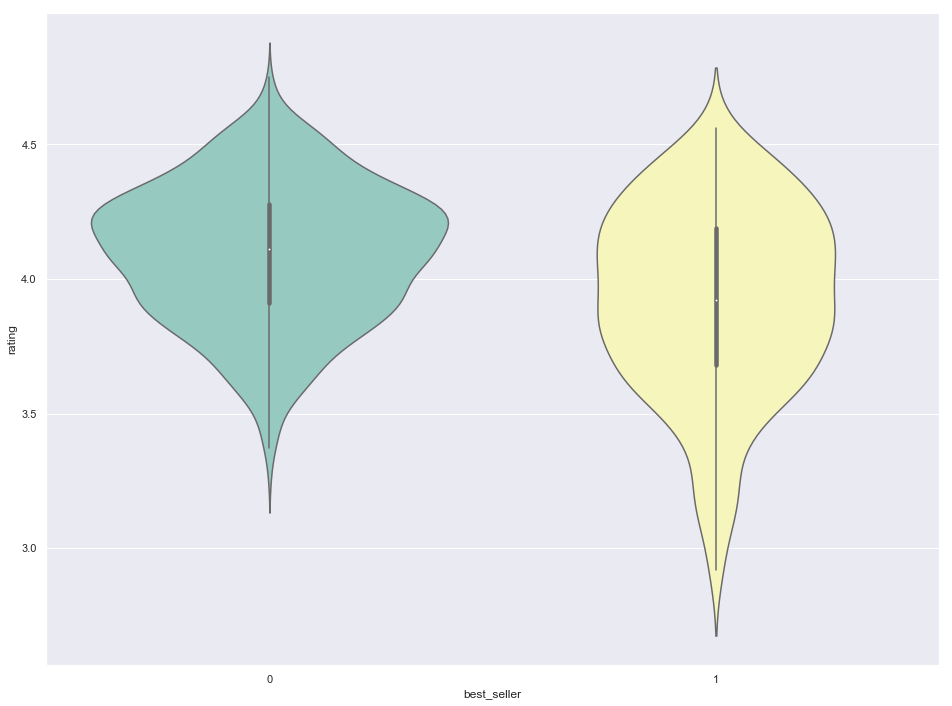

In [275]:
ax = sns.violinplot(x=all_books["best_seller"], y=all_books['rating'], 
                    data=all_books, palette="Set3")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23ca5a90>,
      dtype=object)

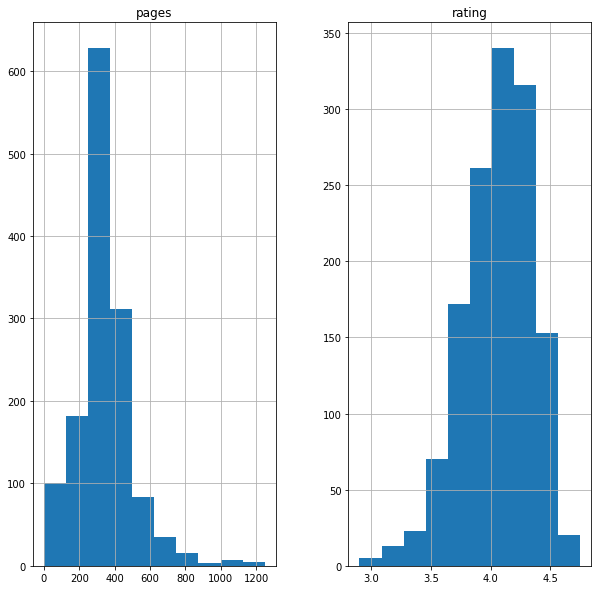

In [231]:
# look at distribution of continuous variables
all_books.hist(column=['pages', 'rating'], figsize=(10,10))


In [263]:
# double check the numbers for this graph
#all_books['genre']

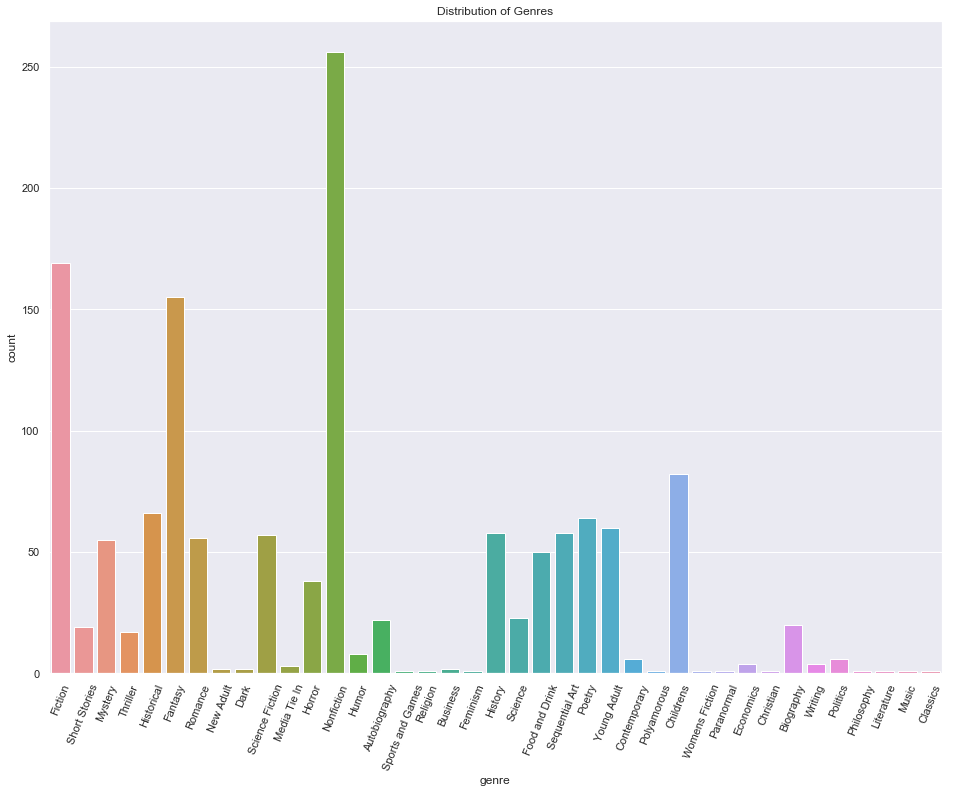

In [268]:
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(all_books['genre'],label="Count", )
plt.xticks(rotation=68)
plt.title('Distribution of Genres')
plt.show()

# Look for catrgorical variables

### Going to make dummies in order of
- genre
- month
- format 
- year (not sure on this one)
- publishers (might add)

These are sequential, so in order to change one, make sure to check what was before it.
The final dataframe (df) stops at format for now.

In [167]:
# Dummies for genre
genres = all_books['genre'].astype('category')

# Make dummies out of the genres feature & drop the first one
genres_dummies = pd.get_dummies(genres, drop_first=True)

# Drop the genre feature from the original dataframe since we now are replacing it with dummies
dropped_genres = all_books.drop(['genre'], axis=1)
# there are 38 categories

# Tie the dummies to the original dataframe
genres_df = pd.concat([dropped_genres, genres_dummies], axis = 1)

In [168]:
genres_df.shape

(1373, 48)

In [169]:
# Dummies for month
months = genres_df['month'].astype('category')

# Make dummies out of the months feature & drop the first one
months_dummies = pd.get_dummies(months, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_months = genres_df.drop(['month'], axis=1)

# Tie the dummies to the original dataframe
months_df = pd.concat([dropped_months, months_dummies], axis = 1)

In [170]:
months_df.shape

(1373, 59)

In [171]:
# Dummies for format
formats = months_df['format'].astype('category')

# Make dummies out of the months feature & drop the first one
formats_dummies = pd.get_dummies(formats, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_formats = months_df.drop(['format'], axis=1)

# Tie the dummies to the original dataframe
formats_df = pd.concat([dropped_formats, formats_dummies], axis = 1)

In [172]:
formats_df.shape

(1373, 65)

In [179]:
# Dummies for year
years = formats_df['year'].astype('category')

# Make dummies out of the months feature & drop the first one
years_dummies = pd.get_dummies(years, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
dropped_years = formats_df.drop(['year'], axis=1)

# Tie the dummies to the original dataframe
years_df = pd.concat([dropped_years, years_dummies], axis = 1)

In [180]:
years_df.shape

(1373, 79)

In [181]:
# Dummies for publishers
# can change formats_df to years_df depending on what we want to keep
publishers = formats_df['publisher'].astype('category')

# Make dummies out of the months feature & drop the first one
publishers_dummies = pd.get_dummies(publishers, drop_first=True)

# Drop the month feature from the original dataframe since we now are replacing it with dummies
# will also have to change formats_df here
dropped_publishers = formats_df.drop(['publisher'], axis=1)

# Tie the dummies to the original dataframe
publishers_df = pd.concat([dropped_publishers, publishers_dummies], axis = 1)

In [183]:
publishers_df.shape

(1373, 461)

In [ ]:
# might want to find the top publishers then make a categorical variable on that

In [184]:
df = formats_df

In [185]:
df.shape

(1373, 65)

In [237]:
df.columns

Index(['author', 'description', 'pages', 'publisher', 'rating', 'title',
       'year', 'best_seller', 'Biography', 'Business', 'Childrens',
       'Christian', 'Classics', 'Contemporary', 'Dark', 'Economics', 'Fantasy',
       'Feminism', 'Fiction', 'Food and Drink', 'Historical', 'History',
       'Horror', 'Humor', 'Literature', 'Media Tie In', 'Music', 'Mystery',
       'New Adult', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry',
       'Politics', 'Polyamorous', 'Religion', 'Romance', 'Science',
       'Science Fiction', 'Sequential Art', 'Short Stories',
       'Sports and Games', 'Thriller', 'Womens Fiction', 'Writing',
       'Young Adult', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Hardcover', 'Kindle Edition', 'Library Binding',
       'Mass Market Paperback', 'Paperback', 'Trade Paperback', 'ebook'],
      dtype='object')

# Clean up descriptions

### Tokenize it by TESTING the nyt best seller data frame

In [64]:
first_desc = nyt_df.iloc[3, 1]

In [63]:
for i in range(nyt_df.shape[0]):
    print(nyt_df.iloc[i, 1])

A novel of breathtaking sweep and emotional power that traces three hundred years in Ghana and along the way also becomes a truly great American novel. Extraordinary for its exquisite language, its implacable sorrow, its soaring beauty, and for its monumental portrait of the forces that shape families and nations, 
Cora is a slave on a cotton plantation in Georgia. Life is hellish for all the slaves but especially bad for Cora; an outcast even among her fellow Africans, she is coming into womanhood - where even greater pain awaits. When Caesar, a recent arrival from Virginia, tells her about the Underground Railroad, they decide to take a terrifying risk and escape. Matters do not go
For readers of Atul Gawande, Andrew Solomon, and Anne Lamott, a profoundly moving, exquisitely observed memoir by a young neurosurgeon faced with a terminal cancer diagnosis who attempts to answer the question What makes a life worth living?
<b><i>New York Times </i>Bestseller<br/><br/>From Harvard sociolo

In [65]:
tokens = word_tokenize(first_desc)

In [67]:
first_desc

'<b><i>New York Times </i>Bestseller<br/><br/>From Harvard sociologist and MacArthur "Genius" Matthew Desmond, a landmark work of scholarship and reportage that will forever change the way we look at poverty in America</b>'

### Tokenize the dataframe

In [208]:
descriptions = df['description']
len(descriptions)
descriptions.iloc[1]


'As the daughter of a meth dealer, Wavy knows not to trust people, not even her own parents. Struggling to raise her little brother, eight-year-old Wavy is the only responsible "adult" around. She finds peace in the starry Midwestern night sky above the fields behind her house. One night everything changes when she witnesses one of her father\'s thugs, Kellen, a tattooed ex-'

In [209]:
def tokenize(sentences):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    clean_sentences = []
    for sentence in sentences:
        arta_tokens_raw = regexp_tokenize(sentence, pattern)

        # lower case
        arta_tokens = [i.lower() for i in arta_tokens_raw]

        # stop words
        stopwords.words("english")

        stop_words = set(stopwords.words('english'))
        arta_tokens_stopped = [w for w in arta_tokens if not w in stop_words]
        
        clean_sentences.append(arta_tokens_stopped)
    return clean_sentences

In [211]:
tokenized_descriptions = tokenize(descriptions)

In [212]:
df['description'] = tokenized_descriptions

In [235]:
df['description'].iloc[3]

['warm',
 'funny',
 'acutely',
 'perceptive',
 'debut',
 'novel',
 'four',
 'adult',
 'siblings',
 'fate',
 'shared',
 'inheritance',
 'shaped',
 'choices',
 'lives']

# Next Steps
- vectorize the descriptions (it's a method)


# Correlation

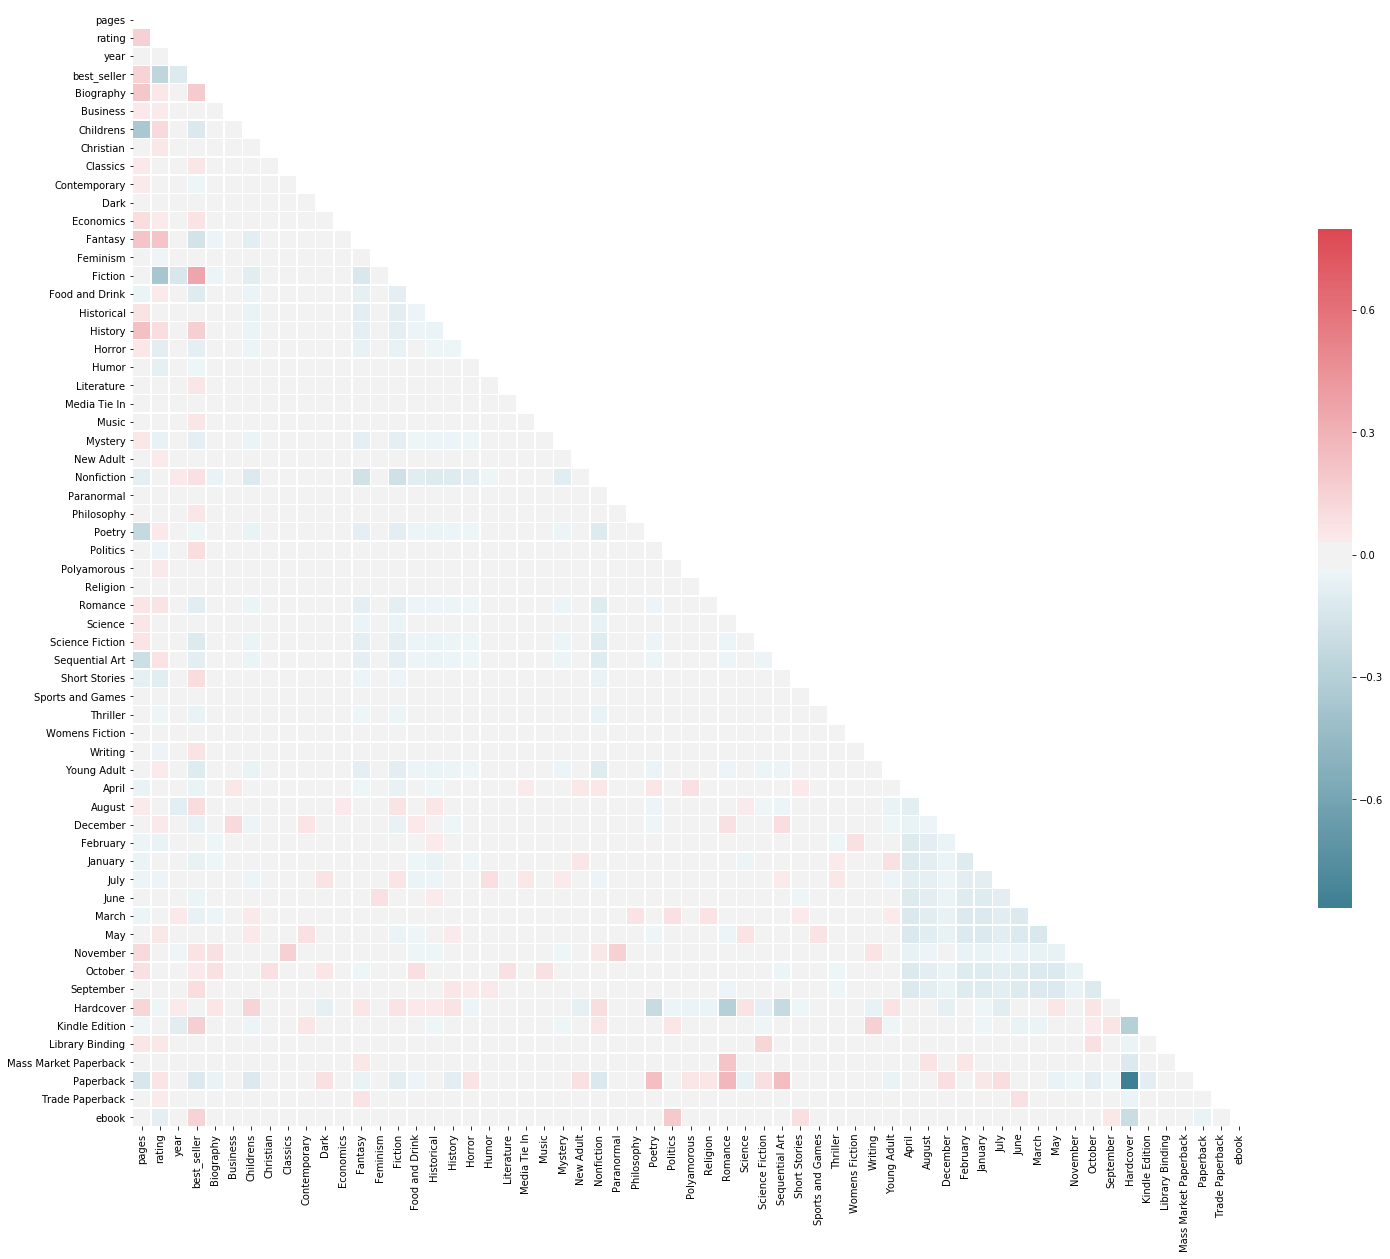

In [221]:
# looking at the correlation matrix for our continuous vars and our categorical vars together:

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})